## Σκοπός και Λειτουργία του Script

Το παρόν script είναι αφιερωμένο στην **οπτικοποίηση και συγκριτική αξιολόγηση** της απόδοσης πολλαπλών ταξινομητικών μοντέλων .

## Κύριος Στόχος
Ο στόχος είναι η δημιουργία μιας σειράς από **γραφήματα-ραντάρ (radar plots)**, ένα για κάθε κλινική κατηγορία (Task). Αυτού του είδους τα γραφήματα είναι ιδανικά για να συγκρίνουν πολυμεταβλητά δεδομένα, καθώς επιτρέπουν την ταυτόχρονη οπτική αξιολόγηση της απόδοσης κάθε μοντέλου (`KNN`, `LR`, `RF`, `SVM`, `XGB`, `SNN`) σε τέσσερις βασικές μετρικές:

- Accuracy  
- Precision  
- Recall  
- F1-Score  

Με μια ματιά, μπορεί κανείς να διακρίνει ποια μοντέλα παρουσιάζουν πιο **ισορροπημένη απόδοση** ή πού υπερτερεί το καθένα.

## Τεχνολογία
Το script χρησιμοποιεί:

- Τη βιβλιοθήκη `pandas` για την οργάνωση των δεδομένων απόδοσης  
- Τη βιβλιοθήκη `matplotlib` (με πολική προβολή) για την κατασκευή των γραφημάτων-ραντάρ  

Η διαδικασία είναι πλήρως αυτοματοποιημένη: δημιουργείται **ένα γράφημα ανά Task**.

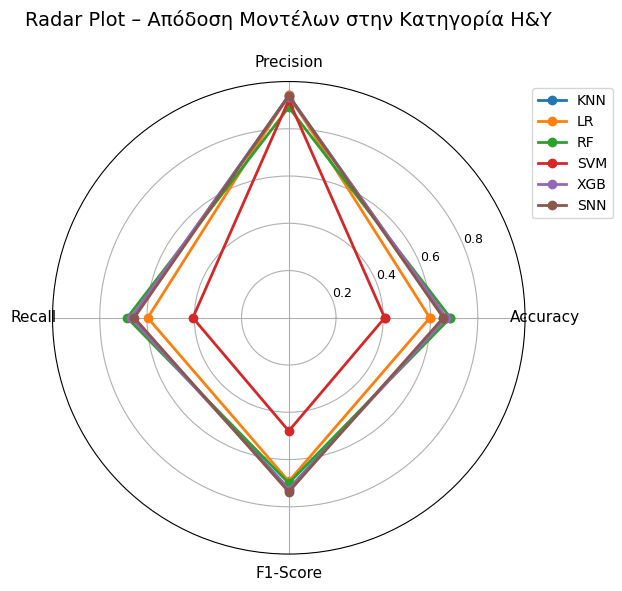

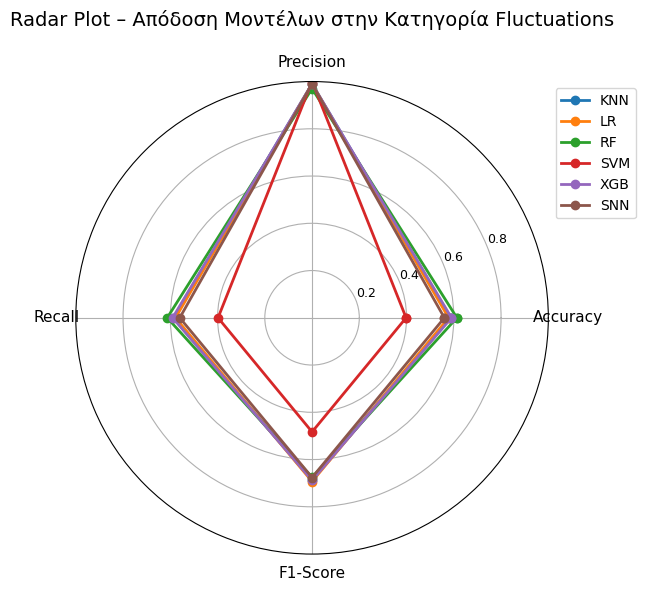

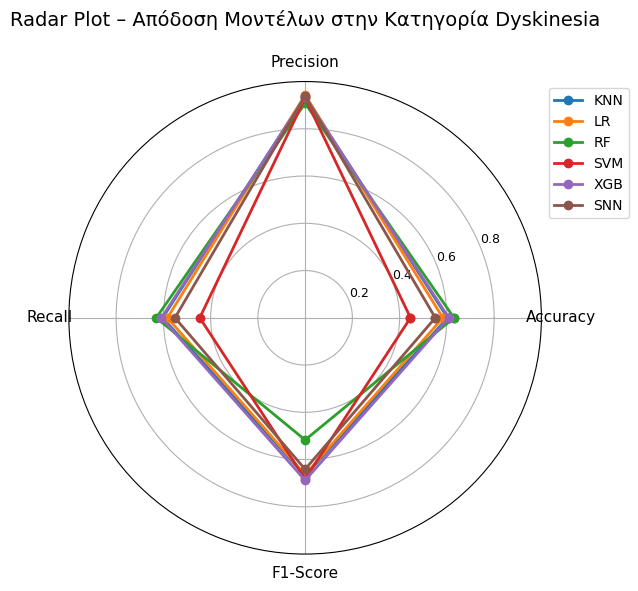

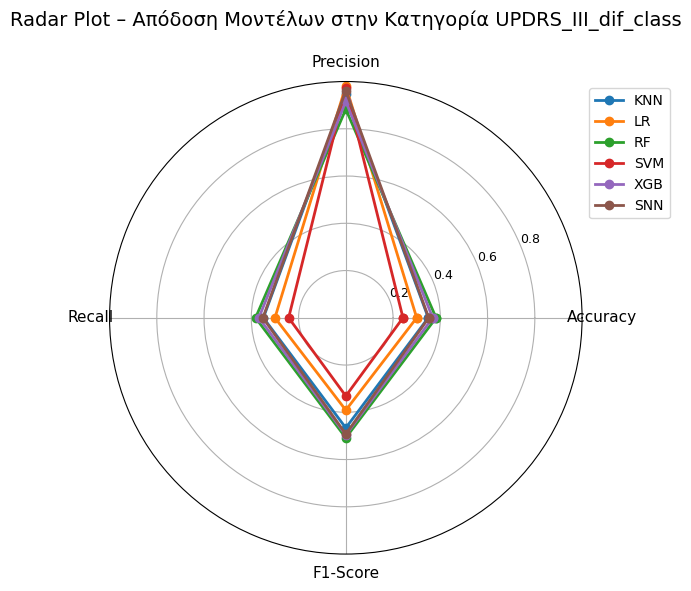

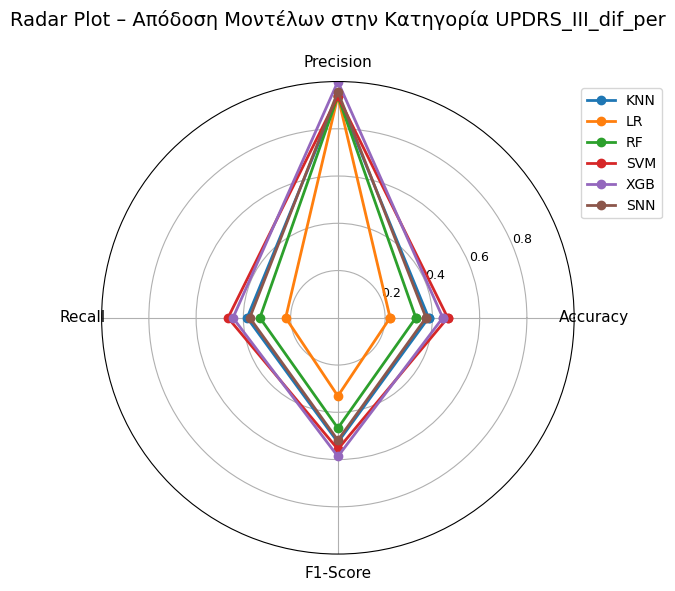

In [2]:
# --- 1. Εισαγωγή Βιβλιοθηκών ---
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import os

# --- 2. Προετοιμασία ---
# Δημιουργία του φακέλου όπου θα αποθηκευτούν τα γραφήματα, αν δεν υπάρχει ήδη.
output_dir = "radar_plots"
os.makedirs(output_dir, exist_ok=True)

# --- 3. Ορισμός Δεδομένων ---
# Τα δεδομένα απόδοσης των μοντέλων ορίζονται χειροκίνητα μέσα σε ένα λεξικό (dictionary).
data = {
    "Task": ["H&Y"] * 6 + ["Fluctuations"] * 6 + ["Dyskinesia"] * 6 +
            ["UPDRS_III_dif_class"] * 6 + ["UPDRS_III_dif_per"] * 6,
    "Model": ["KNN", "LR", "RF", "SVM", "XGB", "SNN"] * 5,
    "Accuracy": [0.663, 0.597, 0.684, 0.406, 0.667, 0.654,
                 0.587, 0.578, 0.613, 0.398, 0.590, 0.560,
                 0.603, 0.583, 0.630, 0.446, 0.608, 0.551,
                 0.349, 0.300, 0.382, 0.242, 0.368, 0.351,
                 0.384, 0.221, 0.330, 0.465, 0.444, 0.373],
    "Precision": [0.941, 0.942, 0.891, 0.921, 0.936, 0.940,
                  0.990, 0.990, 0.970, 1.000, 0.990, 0.990,
                  0.938, 0.943, 0.908, 0.930, 0.934, 0.939,
                  0.948, 0.981, 0.883, 0.974, 0.916, 0.961,
                  0.938, 0.938, 0.938, 0.938, 1.000, 0.957],
    "Recall": [0.663, 0.597, 0.684, 0.406, 0.668, 0.654,
               0.587, 0.578, 0.613, 0.398, 0.590, 0.560,
               0.603, 0.583, 0.630, 0.446, 0.608, 0.551,
               0.349, 0.300, 0.382, 0.242, 0.368, 0.351,
               0.384, 0.221, 0.330, 0.465, 0.444, 0.373],
    "F1-Score": [0.724, 0.692, 0.700, 0.479, 0.728, 0.737,
                 0.688, 0.693, 0.675, 0.483, 0.688, 0.676,
                 0.668, 0.664, 0.517, 0.682, 0.688, 0.641,
                 0.466, 0.391, 0.508, 0.331, 0.496, 0.492,
                 0.527, 0.331, 0.467, 0.556, 0.587, 0.518],
}

df = pd.DataFrame(data)

# --- 4. Ρυθμίσεις και Παράμετροι Γραφημάτων ---

# Οι μετρικές που θα αποτελέσουν τους άξονες του ραντάρ.
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
# Υπολογισμός των γωνιών για κάθε άξονα σε ακτίνια (radians), ώστε να είναι ισοκατανεμημένοι στον κύκλο.
angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
# Προσθήκη της πρώτης γωνίας στο τέλος για να "κλείσει" το σχήμα του ραντάρ.
angles += angles[:1]
tasks = df["Task"].unique()
models = df["Model"].unique()

# Ορισμός ενός λεξικού χρωμάτων για κάθε μοντέλο, για ομοιομορφία στα γραφήματα.
colors = {
    "KNN": "#1f77b4",   # muted blue
    "LR": "#ff7f0e",    # orange
    "RF": "#2ca02c",    # green
    "SVM": "#d62728",   # red
    "XGB": "#9467bd",   # purple
    "SNN": "#8c564b"    # brown
}

# --- 5. Δημιουργία Γραφημάτων-Ραντάρ (Βρόχος) ---
# Βρόχος που επαναλαμβάνεται για κάθε μοναδικό Task.
for task in tasks:
    plt.figure(figsize=(8, 6))
    ax = plt.subplot(111, polar=True)
    plt.title(f"Radar Plot – Απόδοση Μοντέλων στην Κατηγορία {task}", size=14, y=1.1)

    # Φιλτράρισμα του DataFrame ώστε να περιέχει μόνο τα δεδομένα για το τρέχον task.
    task_df = df[df["Task"] == task].set_index("Model")

    # Εσωτερικός βρόχος που επαναλαμβάνεται για κάθε μοντέλο.
    for model in models:
        # Λήψη των τιμών των μετρικών για το τρέχον μοντέλο.
        values = task_df.loc[model, metrics].tolist()
        # Προσθήκη της πρώτης τιμής στο τέλος για να κλείσει το πολύγωνο.
        values += values[:1]
        ax.plot(angles, values, label=model, linewidth=2.0, linestyle='-', color=colors[model], marker='o')

    # --- Ρυθμίσεις των Αξόνων του Ραντάρ ---
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=11)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8"], fontsize=9)
    ax.set_ylim(0, 1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    
    # --- Αποθήκευση και Εμφάνιση ---
    filename = f"radar_plot_{task}.png".replace("/", "_")
    plt.savefig(os.path.join(output_dir, filename))

    plt.show()  # <-- Εμφάνιση στο Notebook
    plt.close()

